In [1]:
from util import load_data, create_fixed_size_grid, create_scaling_grid, create_parallel_scaling_grid, create_e2e_performance_table
all_data = load_data('./20250508', True)

## Machine Spec

Docker on Ubuntu 22.04 Desktop PC
- 8 vCPUs, 16 threads
- 192 GB RAM
- 1 x NVIDIA RTX 5090
- 32 GB GPU Memory

## Project Overview

|Project|Architecture|Proof System|Continuation|GPU Acceleration|
|-|-|-|-|-|
|SP1 v4.1.2|vRAM-style|FRI-STARK(Plonky3)|o|o|
|RISC Zero v2.0.2|vRAM-style|FRI-STARK|o|o|
|ZKM v1.0.0|vRAM-style|FRI-STARK(Plonky2)|o|x|
|OpenVM #333b3|Modular-style|FRI-STARK(Plonky3)|o|x|
|Jolt #edce5|Modular-style|Lasso Lookup Argument|x|△|
|Nexus v0.3.1|Modular-style|FRI-STARK(Stwo)|o|x|
|Pico|Modular-style|FRI-STARK(Plonky3)|o|x|

- vRAM-style: executes custom circuits defined for each type of instruction like CPU/Memory/Branch in data parallel.
- Modular-style: executes custom circuits defined for each instruction such as add/mul/sw

## E2E Performance Comparison (Multi Threads)

In [2]:
create_e2e_performance_table(all_data, 16)

,"(Prover Time (s), fib)","(Prover Time (s), sha2)","(Prover Time (s), ecdsa)","(Prover Time (s), ethtransfer)","(Verifier Time (ms), fib)","(Verifier Time (ms), sha2)","(Verifier Time (ms), ecdsa)","(Verifier Time (ms), ethtransfer)","(Proof Size (KB), fib)","(Proof Size (KB), sha2)","(Proof Size (KB), ecdsa)","(Proof Size (KB), ethtransfer)","(Peak Memory (GB), fib)","(Peak Memory (GB), sha2)","(Peak Memory (GB), ecdsa)","(Peak Memory (GB), ethtransfer)"
sp1,9.44,6.33,41.47,38.52,114.13,114.75,340.41,266.83,1757.61,1757.63,6234.73,4831.83,7.03,5.65,21.56,29.82
sp1-gpu,3.55,3.75,13.67,9.41,111.68,112.48,339.08,264.57,1757.61,1757.63,6234.73,4831.83,1.34,1.38,1.38,1.41
risczero,38.89,22.49,39.29,195.62,7.99,7.84,7.81,7.85,217.45,217.45,217.45,217.45,4.63,2.34,4.57,9.20
risczero-gpu,0.70,0.51,0.98,3.78,7.82,8.07,8.35,7.85,217.45,217.45,217.45,217.45,0.50,0.48,0.48,0.67
openvm,2.12,1.03,13.43,7.70,37.24,55.43,45.42,45.54,752.51,928.61,897.94,893.67,2.30,1.48,11.62,7.16
pico,54.44,11.46,125.63,55.98,NaN,NaN,NaN,NaN,6141.78,2847.43,10229.55,6766.92,40.91,11.15,88.94,42.98
zkm,9.93,2.99,93.86,NaN,NaN,NaN,NaN,NaN,2542.89,2521.51,10390.99,NaN,9.51,5.89,50.30,NaN
nexus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jolt,12.63,3.46,104.20,NaN,52.16,32.87,608.13,NaN,204.60,186.78,263.96,NaN,9.30,5.11,59.19,NaN


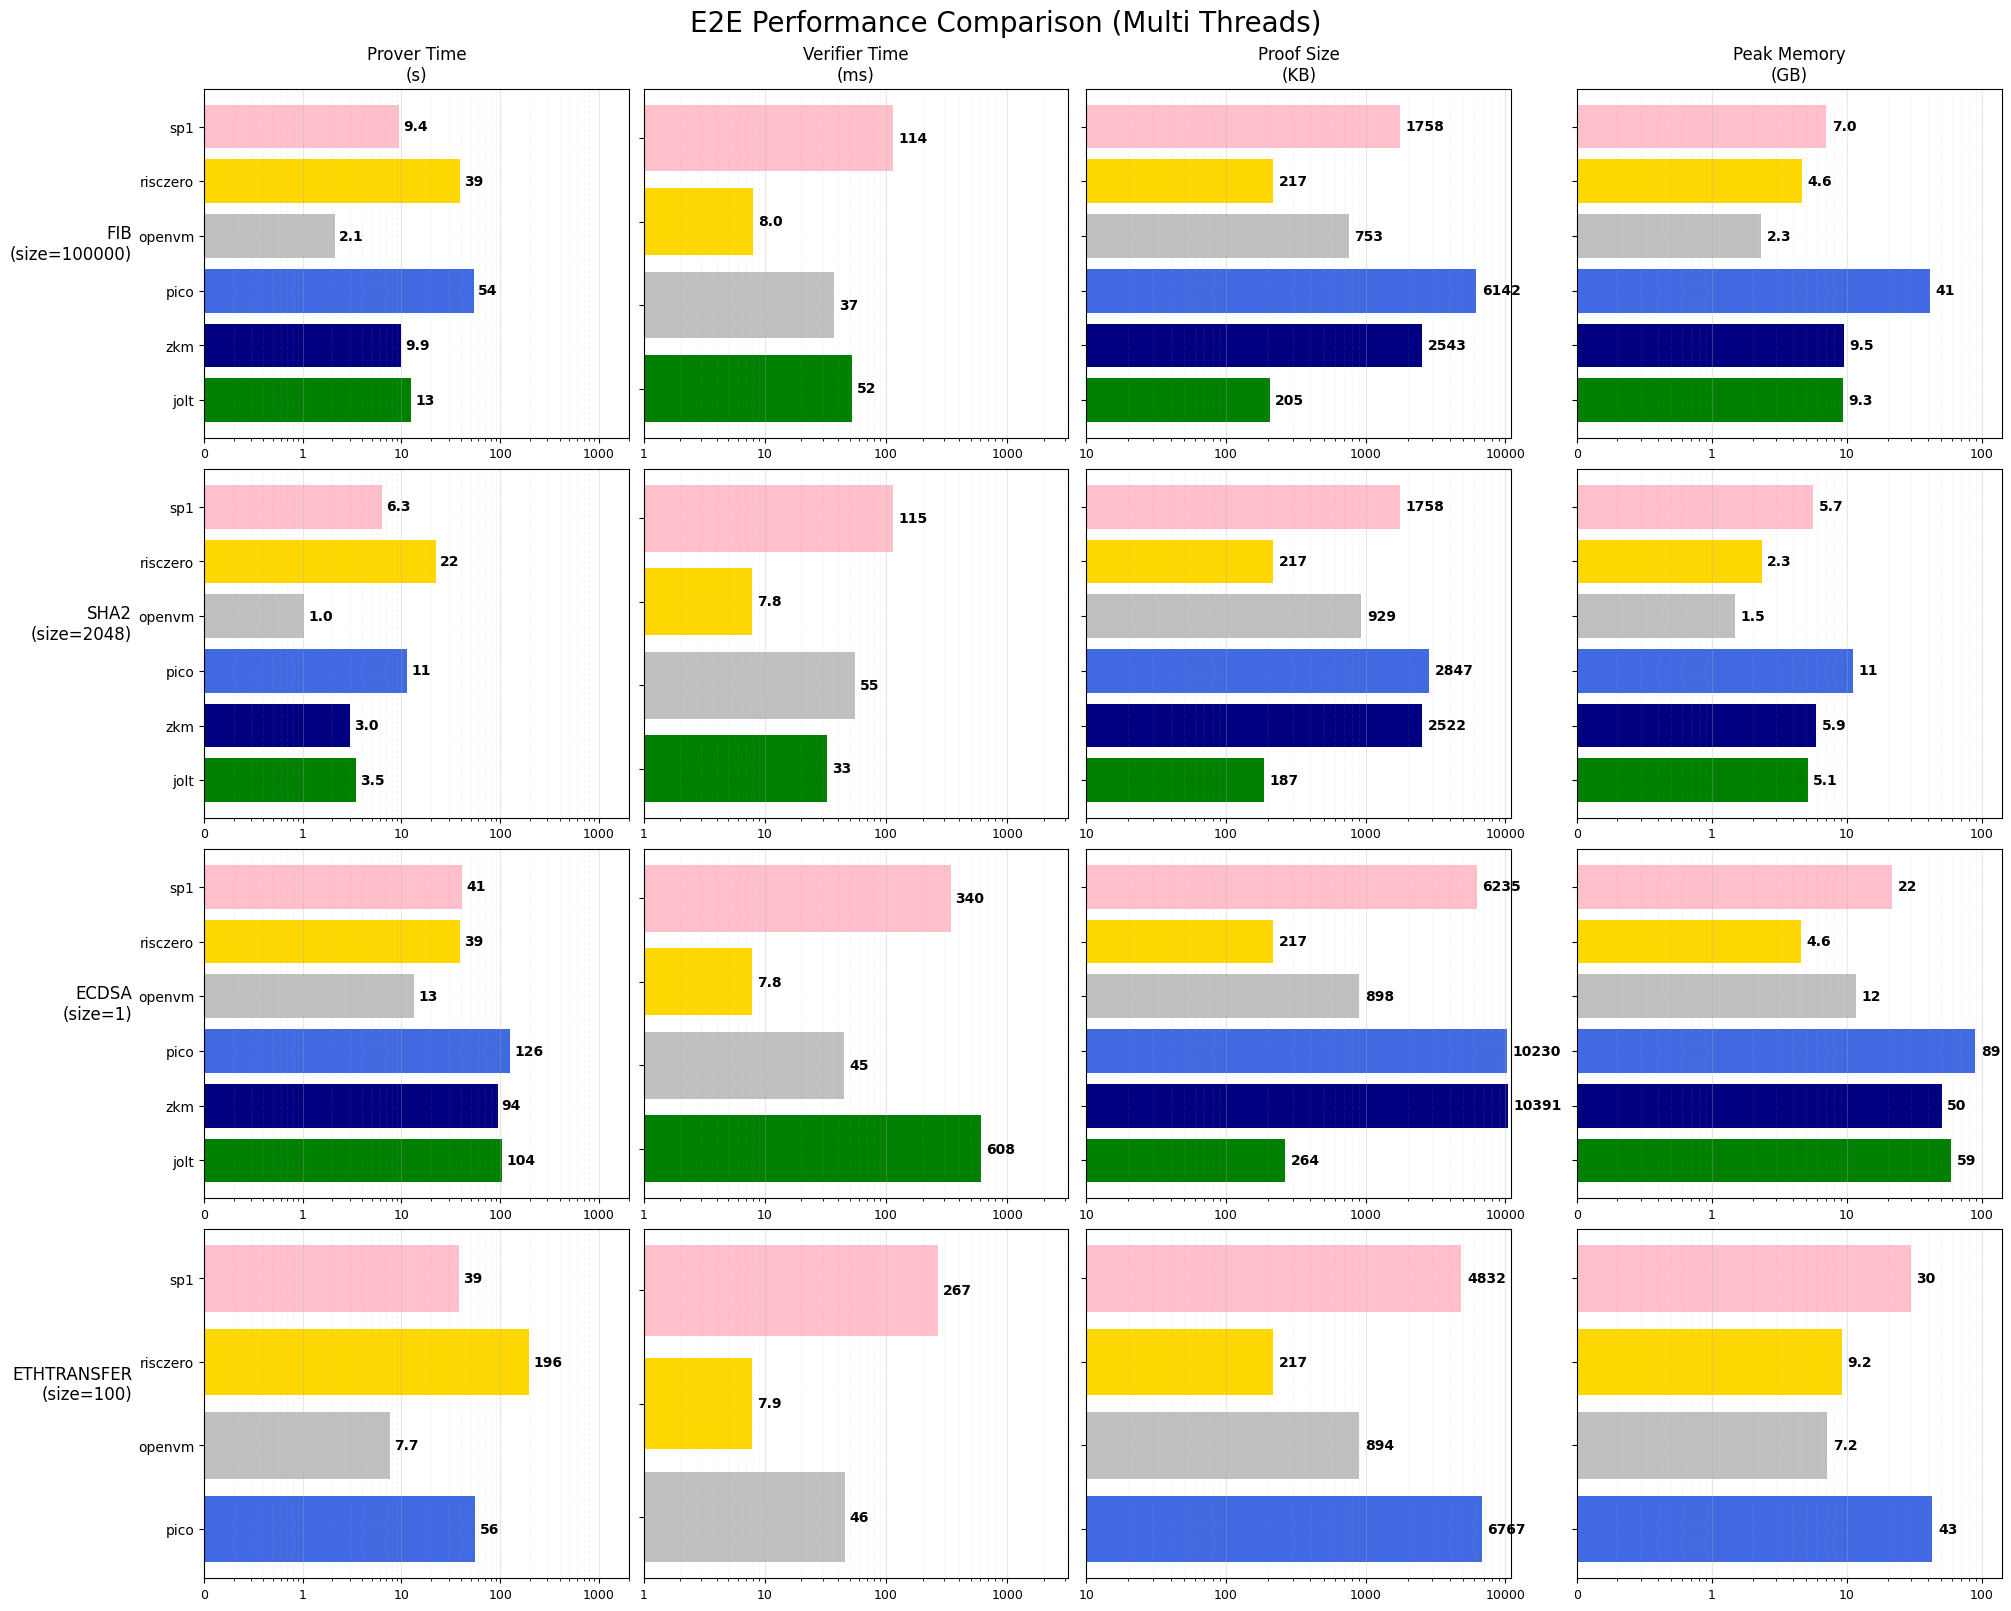

In [4]:
create_fixed_size_grid(all_data, thread_count=16)

## E2E Performance Comparison (Single Thread)

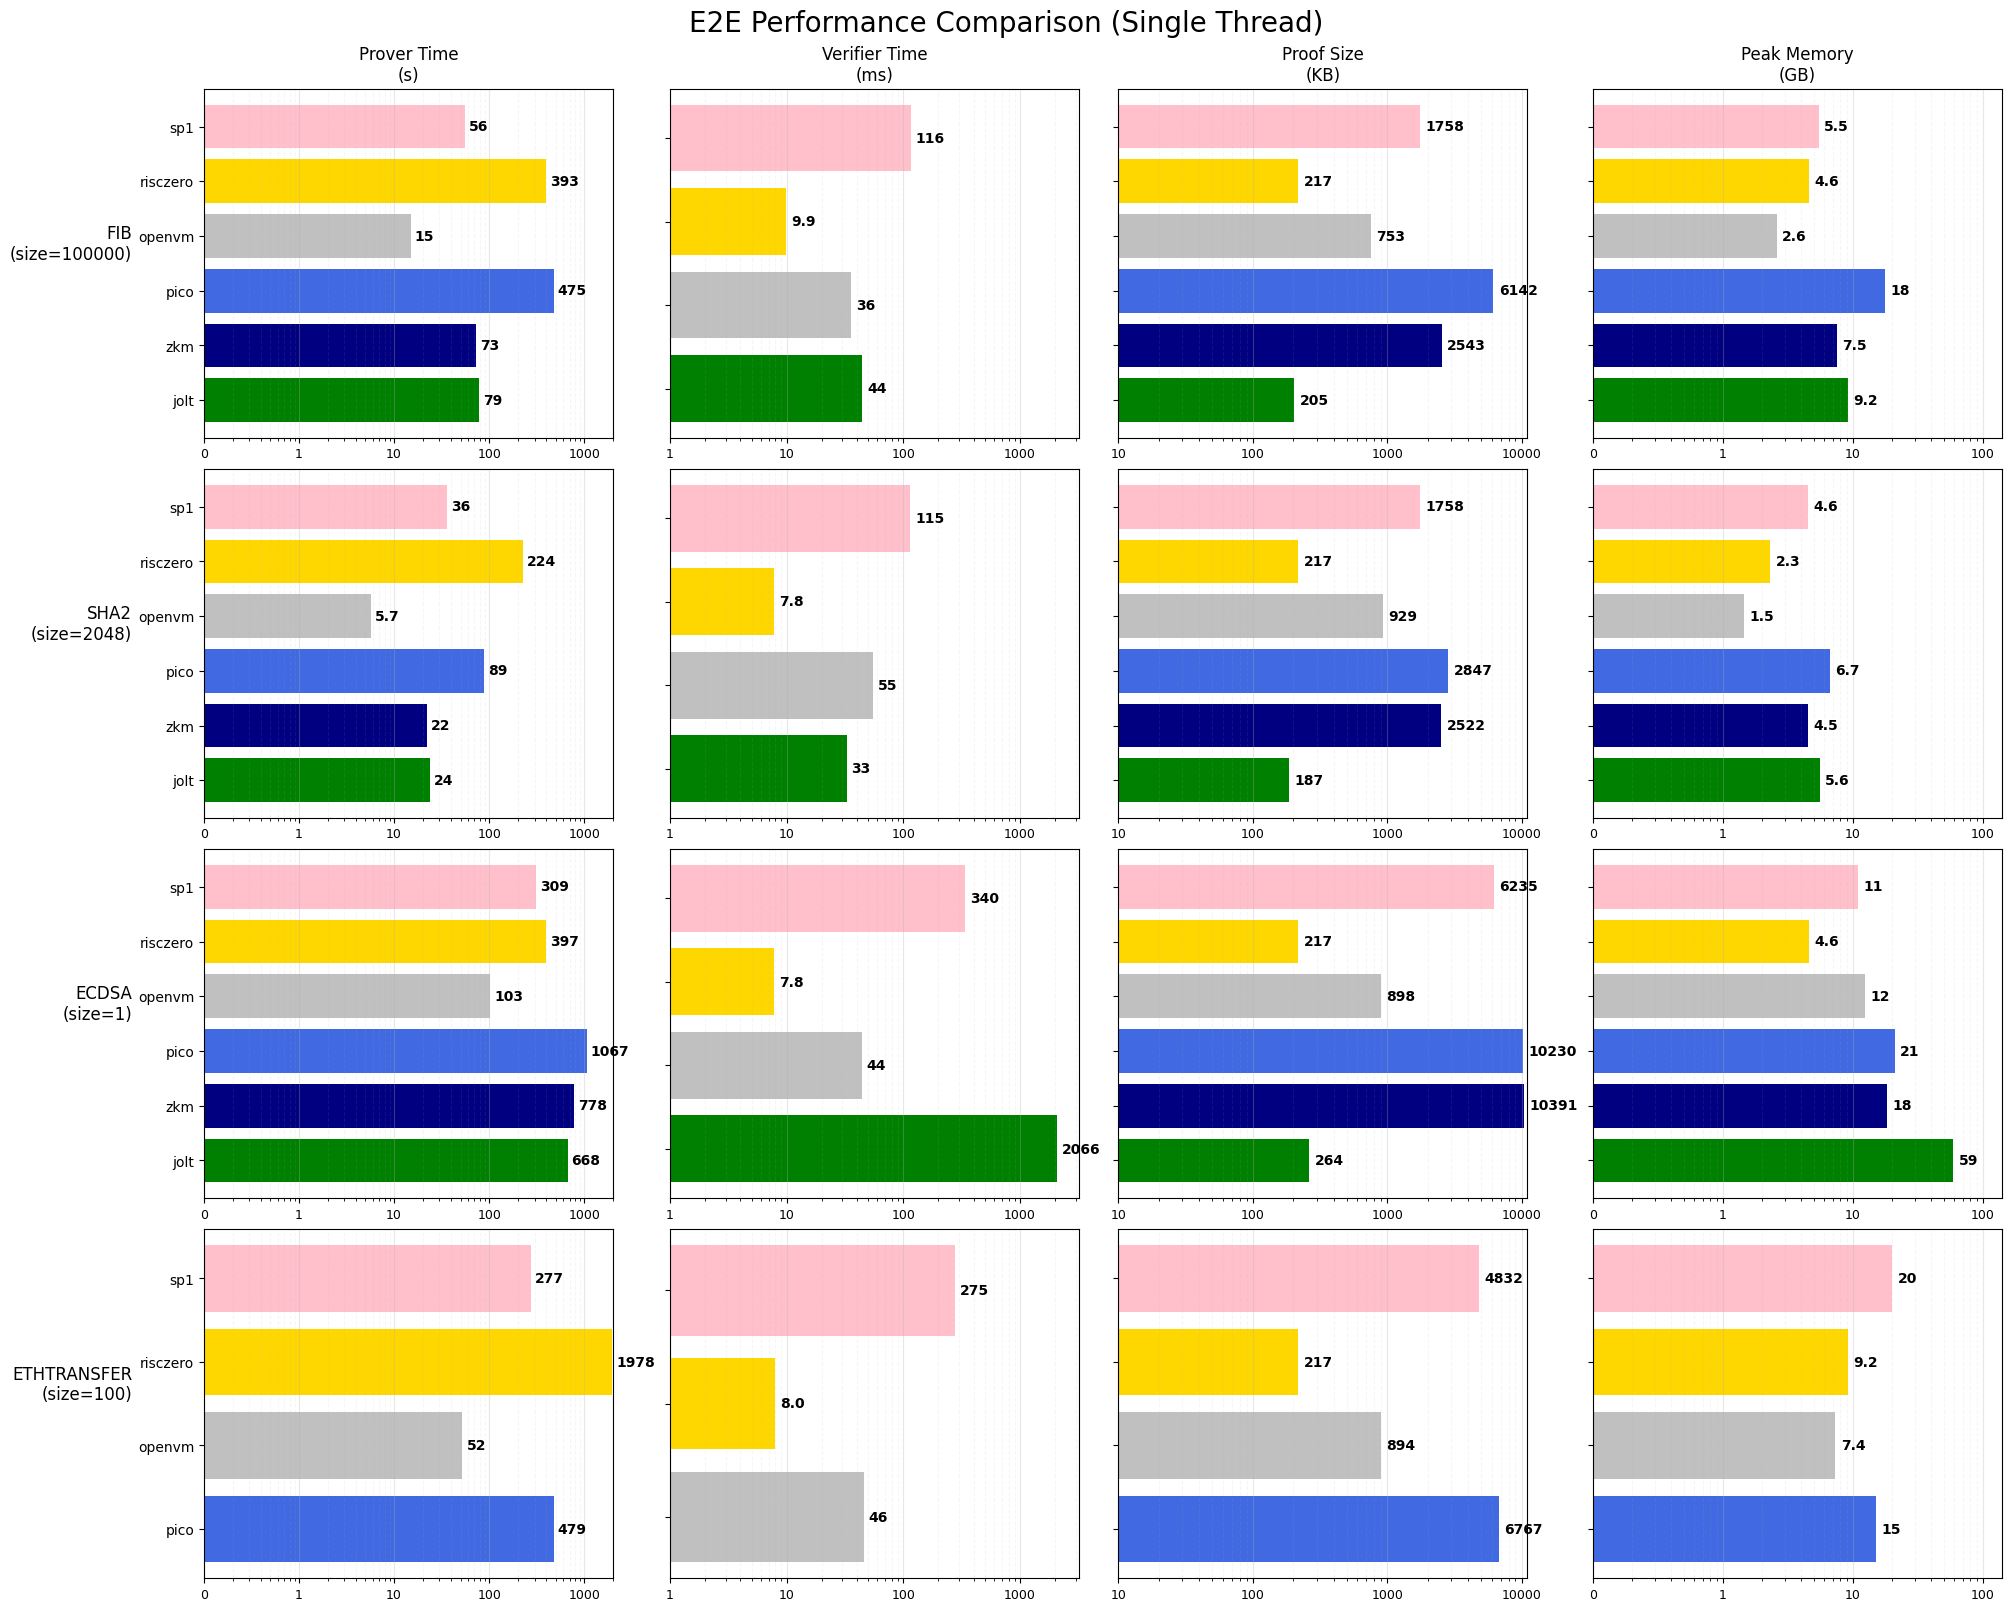

In [6]:
create_fixed_size_grid(all_data, thread_count=1)

## Scalability Curve

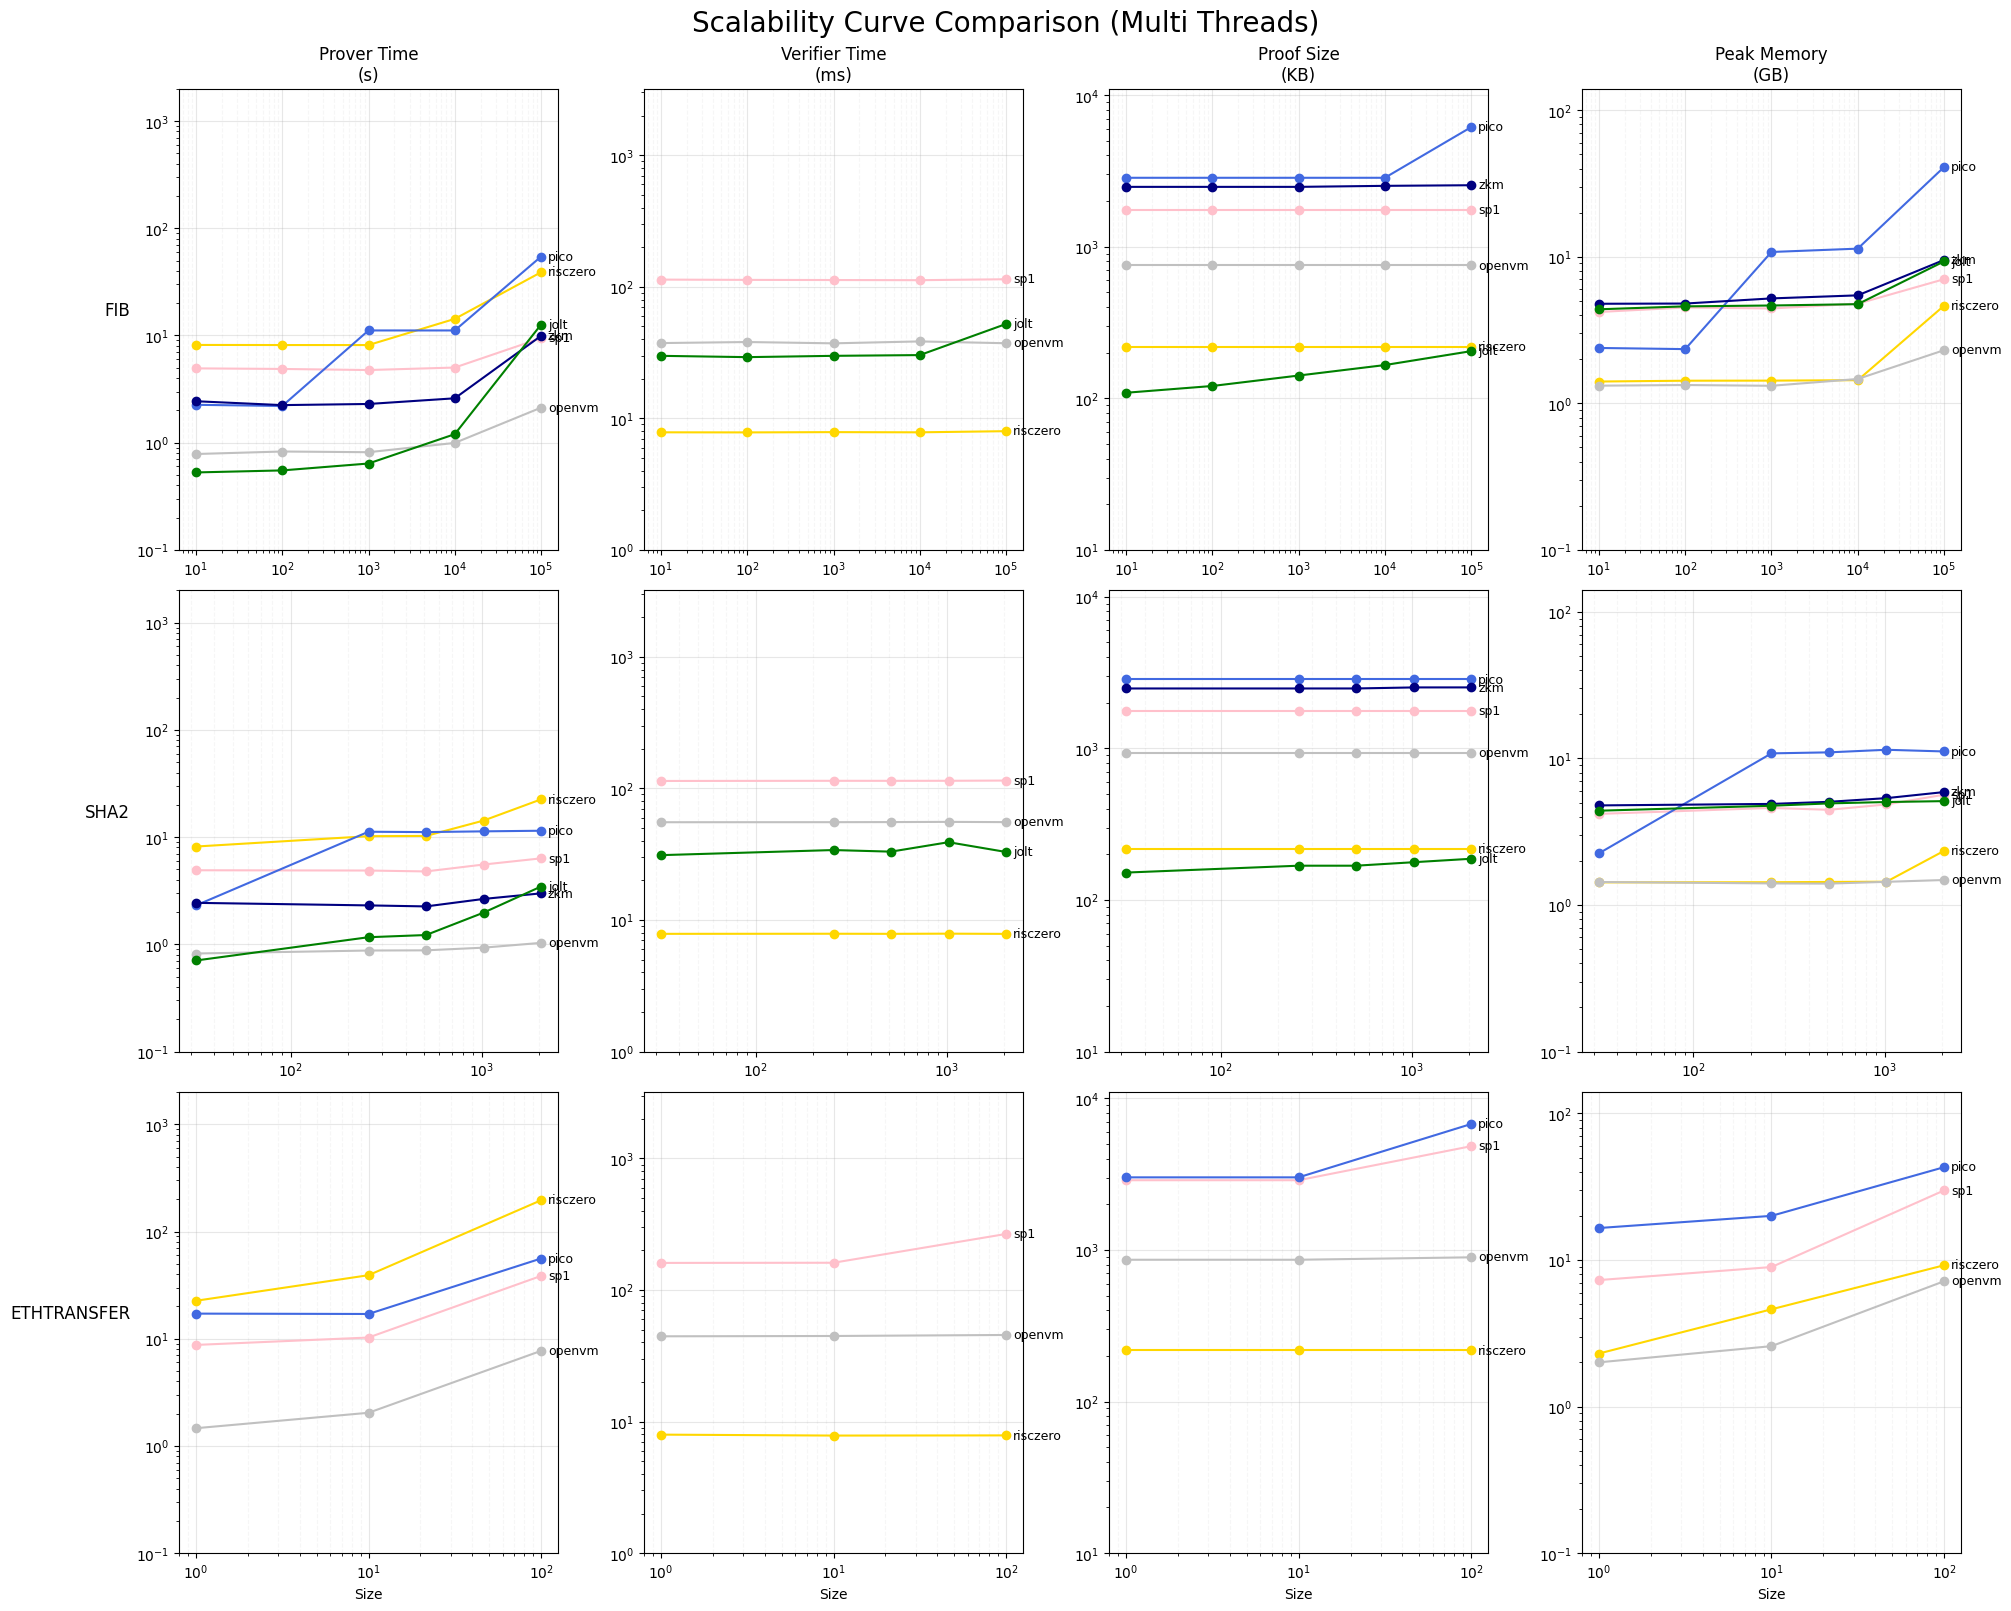

In [7]:
create_scaling_grid(all_data, thread_count=16)

## Parallel Performance

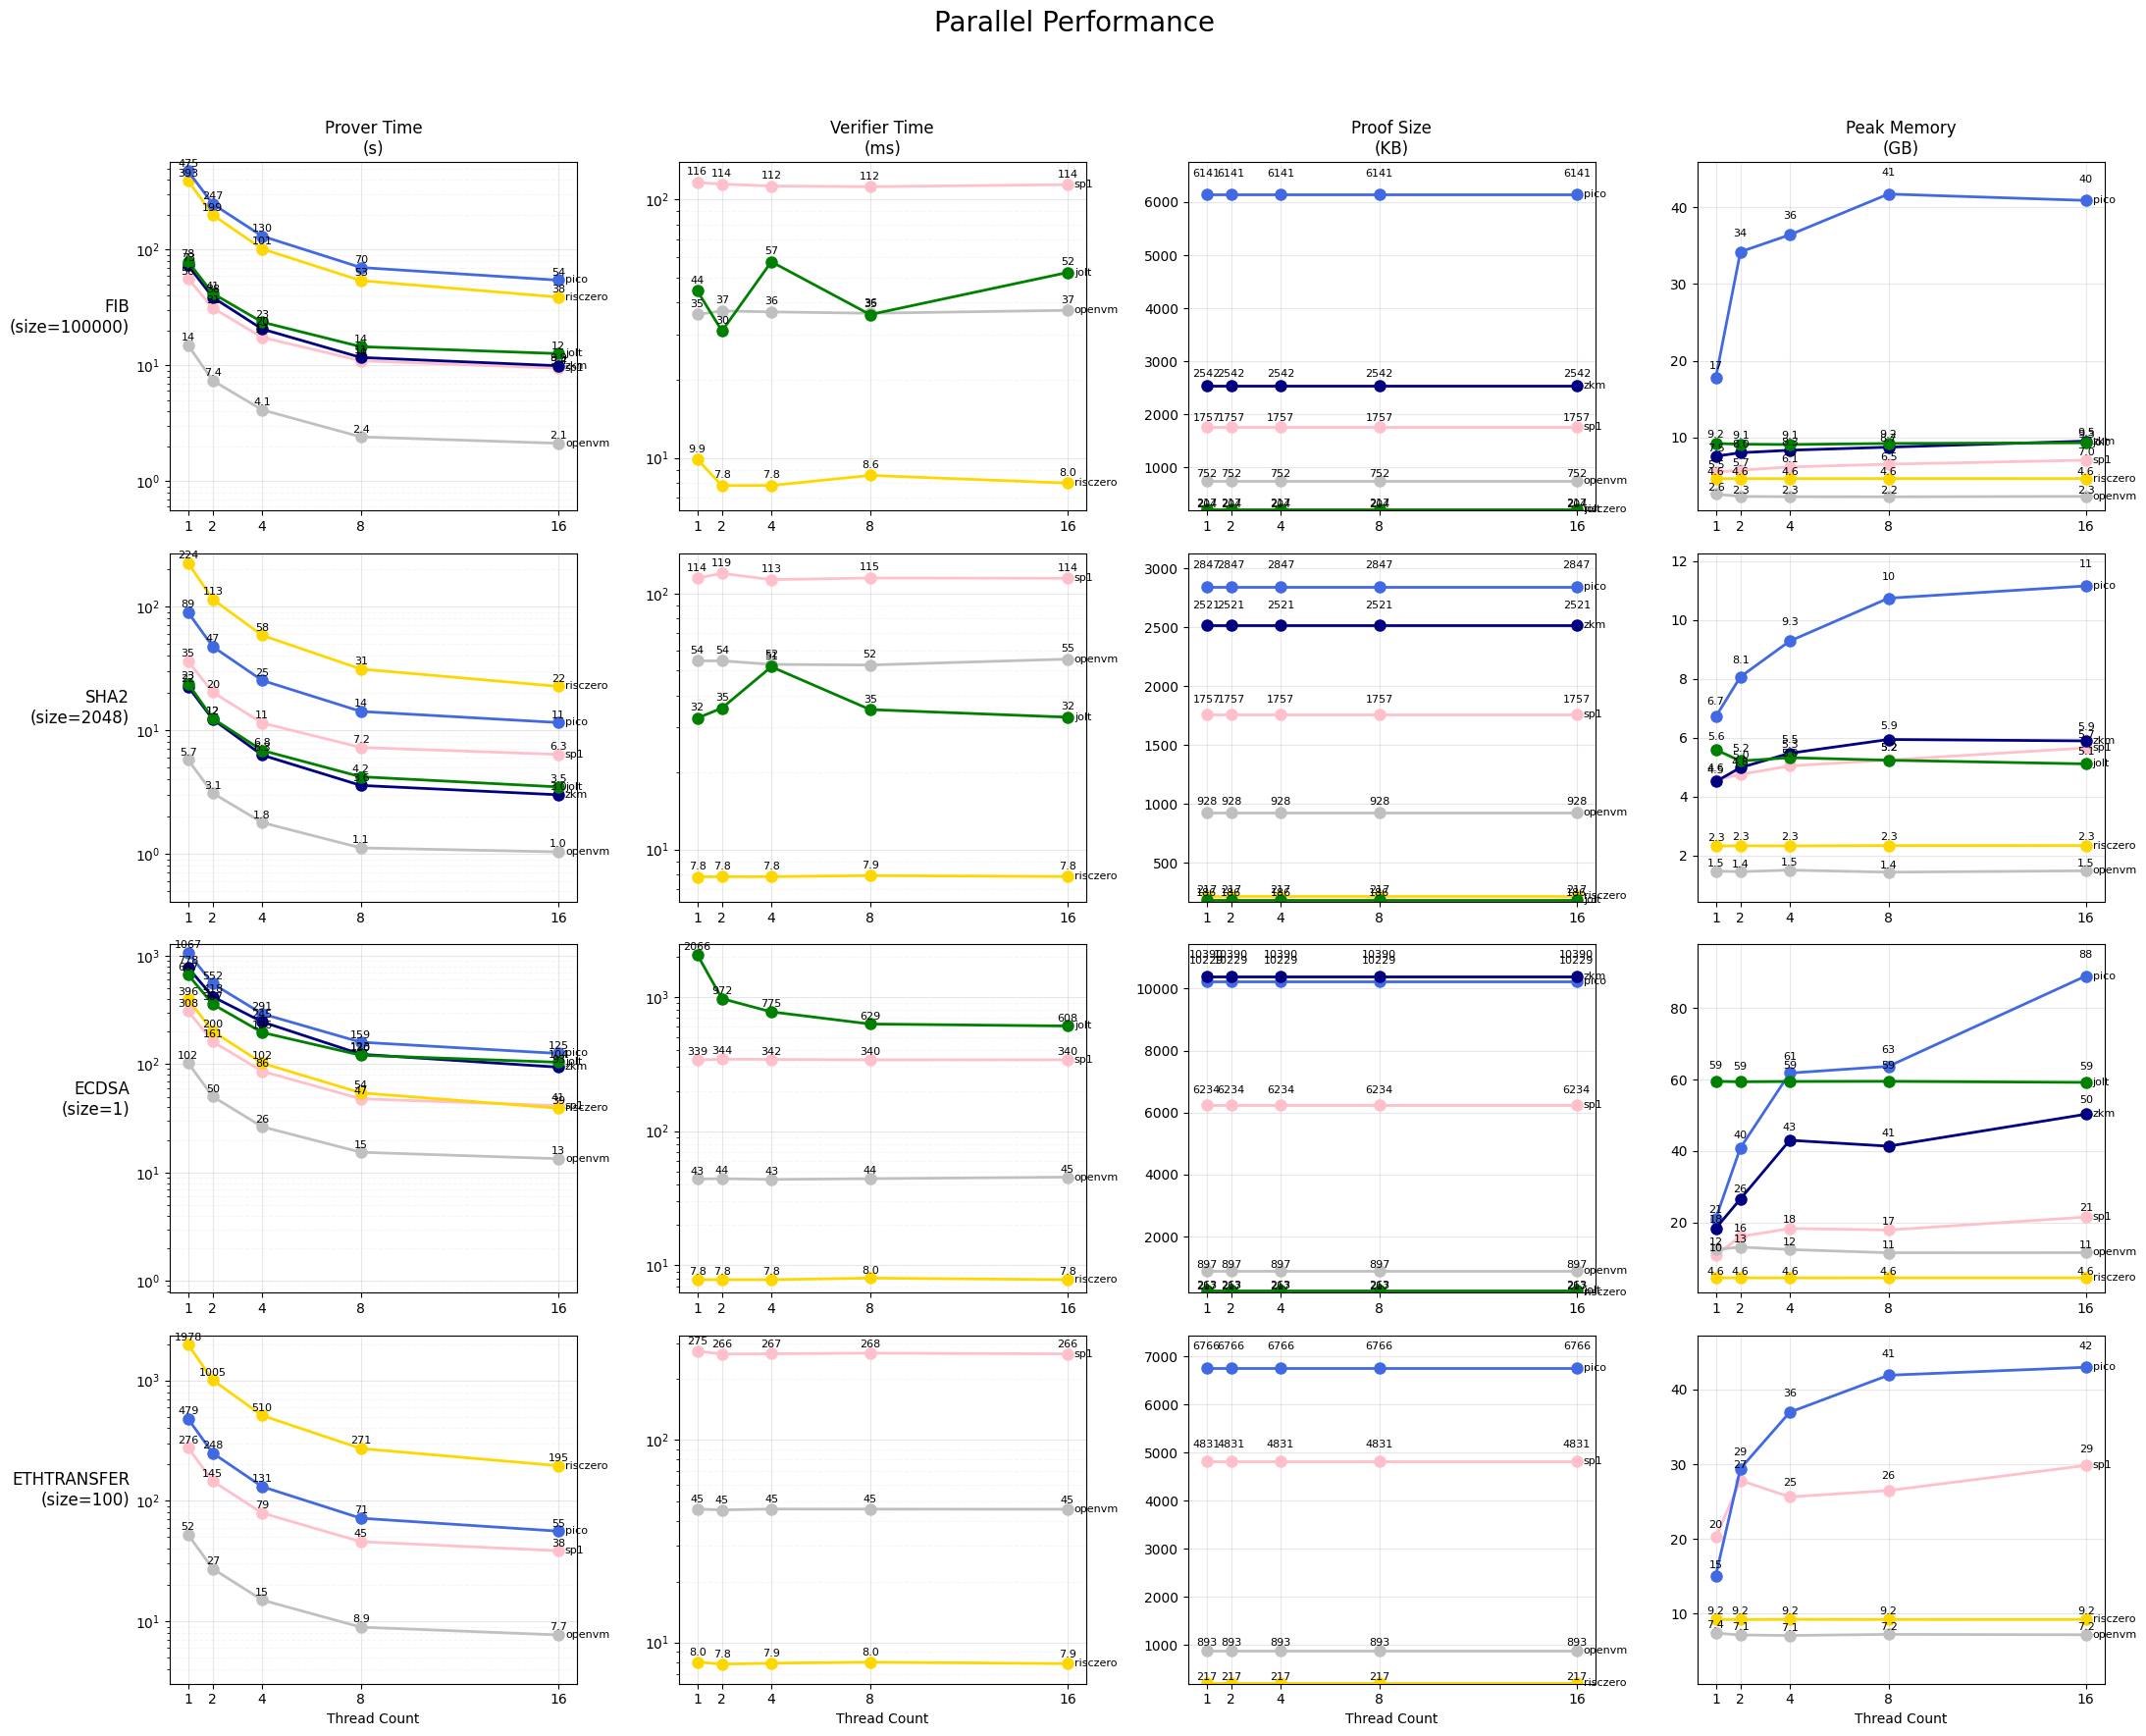

In [8]:
create_parallel_scaling_grid(all_data)

## Primitive Call Counts

In [9]:
all_data[(all_data['project'] == 'openvm') & (all_data['program'] == 'fib')]

,size,exec_duration,proof_duration,verify_duration,cycles,elf_line_counts,proof_bytes,peak_memory,program,project,thread_count
60,10,34614970,4966978448,35418556,0,2700,770572,1405558784,fib,openvm,1.0
61,100,33613484,4926809385,35117643,0,2700,770572,1516126208,fib,openvm,1.0
62,1000,45527050,5011414762,36829323,0,2700,770572,1603264512,fib,openvm,1.0
63,10000,65720782,6027021133,35170626,0,2700,770572,1756012544,fib,openvm,1.0
64,100000,105933299,14901962397,35917659,0,2700,770572,2794323968,fib,openvm,1.0
65,10,34295155,2643932681,36140357,0,2700,770572,1401614336,fib,openvm,2.0
66,100,41624625,2719646877,36125242,0,2700,770572,1379774464,fib,openvm,2.0
67,1000,45897127,2756760703,36440847,0,2700,770572,1413259264,fib,openvm,2.0
68,10000,64245397,3276361081,36936393,0,2700,770572,1532661760,fib,openvm,2.0
69,100000,95658509,7383099098,37042844,0,2700,770572,2461462528,fib,openvm,2.0
